In [4]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("./Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.shape

(200, 5)

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
#Check missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

SyntaxError: invalid syntax (<ipython-input-40-cebb4be47cdc>, line 1)

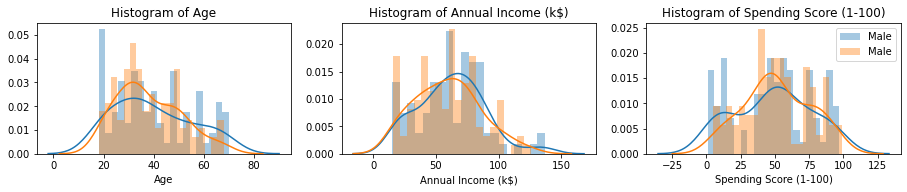

In [6]:
#Check data distributions
n=0
fig = plt.subplots(1,3)
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(left=0,bottom = 0,right=2,top=1)
    sns.distplot(data[data['Gender']=='Male'][i],bins=20)
#     plt.legend(data['Gender']) 
#     plt.title('Histogram of {}'.format(i))
    
#     plt.subplot(2,3,n)
#     plt.subplots_adjust(left=0,bottom = 1,right=2,top=3)
    sns.distplot(data[data['Gender']=='Female'][i],bins=20)
#     plt.legend(data['Gender']) 
    plt.title('Histogram of {}'.format(i))
plt.legend(data['Gender'])  
plt.show()

In [7]:
# RF regressor
from sklearn.ensemble import RandomForestRegressor
X_RF = data[['Age','Annual Income (k$)']]
Y_RF = data['Spending Score (1-100)']

In [65]:
Y_RF_test.shape

(60,)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_RF_train,X_RF_test,Y_RF_train,Y_RF_test = train_test_split(X_RF,Y_RF,test_size=0.3)
rf = RandomForestRegressor(n_estimators=250)
rf.fit(X_RF_train,Y_RF_train)
Y_RF_pred = rf.predict(X_RF_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_RF_test, Y_RF_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_RF_test, Y_RF_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_RF_test, Y_RF_pred)))

Mean Absolute Error: 13.575739682539684
Mean Squared Error: 441.00368936612244
Root Mean Squared Error: 21.000087841866815


In [9]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_RF_train,Y_RF_train)
Y_reg_pred = reg.predict(X_RF_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_RF_test, Y_reg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_RF_test, Y_reg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_RF_test, Y_reg_pred)))

Mean Absolute Error: 23.062877552400547
Mean Squared Error: 712.1308254750537
Root Mean Squared Error: 26.685779461635626


In [2]:
#brew install lightgbm   -- If LightGBM package is missing

SyntaxError: invalid syntax (<ipython-input-2-0eadaa3233a2>, line 1)

In [27]:
# LGBM regressor
from lightgbm import LGBMRegressor
lgbr = LGBMRegressor(boosting_type='dart')

In [28]:
lgbr.fit(X_RF_train,Y_RF_train)

LGBMRegressor(boosting_type='dart')

In [29]:
Y_lgb_pred = lgbr.predict(X_RF_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_RF_test, Y_lgb_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_RF_test, Y_lgb_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_RF_test, Y_lgb_pred)))

Mean Absolute Error: 17.59097927265496
Mean Squared Error: 528.9312370217273
Root Mean Squared Error: 22.998505104065508


In [38]:
#XGB regressor
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 10)
xgb.fit(X_RF_train,Y_RF_train)
Y_xgb_pred = xgb.predict(X_RF_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_RF_test, Y_xgb_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_RF_test, Y_xgb_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_RF_test, Y_xgb_pred)))

Mean Absolute Error: 14.263074612617492
Mean Squared Error: 505.72477950266756
Root Mean Squared Error: 22.488325404588657


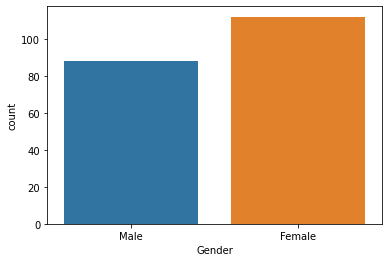

In [39]:
sns.countplot(data['Gender'])

In [40]:
km_data = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [43]:
km_data.columns 

'Age'

In [55]:
excl_cols={}
for i in km_data.columns:
    excl_cols[i]=[]
    for j in km_data.columns[km_data.columns!=i]:
        excl_cols[i].append(j)

In [63]:
excl_cols['Age'][0]

'Annual Income (k$)'

Clustering based on:  ['Annual Income (k$)', 'Spending Score (1-100)']


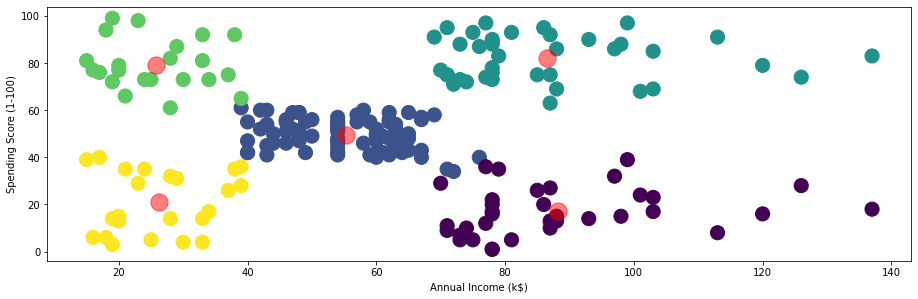

Clustering based on:  ['Age', 'Spending Score (1-100)']


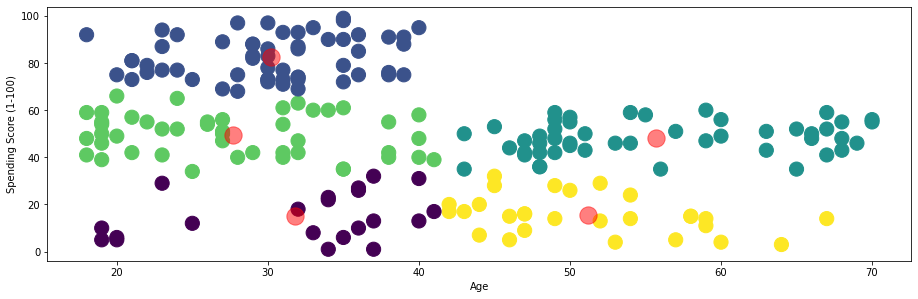

Clustering based on:  ['Age', 'Annual Income (k$)']


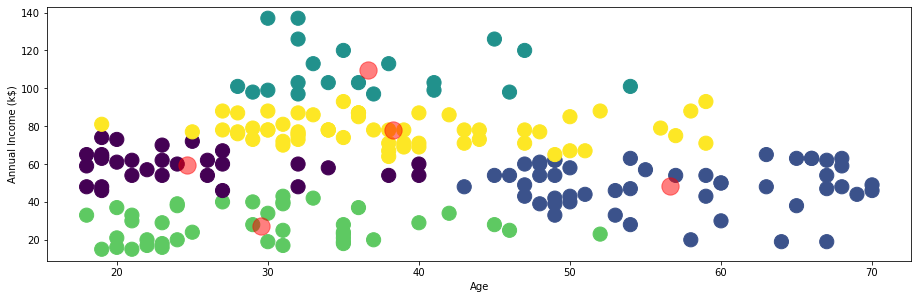

In [77]:
#K-Means Clustering
p=0
for i in km_data.columns:
    p+=1
    X2 = excl_cols[i]
    print("Clustering based on: ",X2)
    clust = km_data[X2]
    alg = KMeans(n_clusters = 5)
    alg.fit(clust)
    labels = alg.labels_
    centroids = alg.cluster_centers_
#     plt.figure(figsize=(5,5))
    plt.subplot(3,1,p)
    plt.subplots_adjust(0,0,2,3)
    plt.scatter(x=X2[0],y=X2[1],data=km_data,c=labels,s=200)
    plt.scatter(x=centroids[:,0],y=centroids[:,1],s=300,c='red',alpha=0.5)
    plt.xlabel(X2[0])
    plt.ylabel(X2[1])
    plt.show()

In [65]:
kkk = km_data[X2]

In [66]:
kkk.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [81]:
# pip install plotly

     |████████████████████████████████| 13.2 MB 4.0 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=064c28a825fea0678c2a9577d9adcc5726345f2efe990ee0aa0fdeb8bc4da529
  Stored in directory: /Users/Karthik/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [87]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(km_data)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [94]:
#3D plot
import plotly as py
import plotly.graph_objs as go
trace1 = go.Scatter3d(
    x= km_data['Age'],
    y= km_data['Spending Score (1-100)'],
    z= km_data['Annual Income (k$)'],
     mode='markers',
     marker=dict(
        color = labels3, 
        size= 20,
        line=dict(
            color= labels3,
            width= 12
        ),
        opacity=0.8
     )
)
data=[trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data,layout=layout)
py.offline.iplot(fig)

In [84]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

NameError: name 'df' is not defined